# Idea

I'd like to make a singular figure that shows maps of ONC, NGC 1333, and IC 348 all together. Dots are cluster members, colored dots are $\geq$M4 (i.e., $\leq$3270 K), "x"s are failed matches to our photometry, etc.

I think this will draw on the following scripts I've already written:
* `bd_matching_onc.py`
* `bd_matching_ic348.py`
* `bd_matching_ngc1333.py`

though I might make a new script that consolidates what's needed and discards what's not.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import astropy.table
from astropy.coordinates import SkyCoord, Angle
from astropy import units as u

In [105]:
from wuvars.analysis.bd_matching_onc import confident_members, matches
from wuvars.analysis.bd_matching_onc import robb_joined, robb_coordinates

confident_members_M4_onc = (robb_joined["Teff"] <= 3200) & (robb_joined["log(BF)"] > np.log10(99))
confident_members_M6_onc = (robb_joined["Teff"] <= 2990) & (robb_joined["log(BF)"] > np.log10(99))
confident_members_M8_onc = (robb_joined["Teff"] <= 2710) & (robb_joined["log(BF)"] > np.log10(99))


In [106]:
np.sum(np.array([confident_members_M4_onc, confident_members_M6_onc, confident_members_M8_onc]), axis=1)

array([531, 285,  65])

In [107]:
from wuvars.analysis.bd_matching_ngc1333 import matches as ngc_matches
from wuvars.analysis.bd_matching_ngc1333 import L16_T2_coordinates, L16_T2, L16_SpT_num

members_M4_ngc = np.array(L16_SpT_num) >= 4.5
members_M6_ngc = np.array(L16_SpT_num) >= 6.0
members_M8_ngc = np.array(L16_SpT_num) >= 8.0



In [108]:
np.sum(np.array([members_M4_ngc, members_M6_ngc, members_M8_ngc]), axis=1)

array([105,  65,  37])

In [109]:
from wuvars.analysis.bd_matching_ic348 import matches as ic_matches
from wuvars.analysis.bd_matching_ic348 import L16_SpT_num as L16_SpT_num_ic
from wuvars.analysis.bd_matching_ic348 import L16_T1_coordinates, L16_T1

members_M4_ic = np.array(L16_SpT_num_ic) >= 4.5
members_M6_ic = np.array(L16_SpT_num_ic) >= 6.0
members_M8_ic = np.array(L16_SpT_num_ic) >= 8.0


In [110]:
np.sum(np.array([members_M4_ic, members_M6_ic, members_M8_ic]), axis=1)

array([238,  84,  40])

In [101]:
from wuvars.analysis.spectral_type_to_temperature import get_Teff_from_SpT, get_SpT_from_Teff

Text(0.0, 1.0, 'NGC 1333')

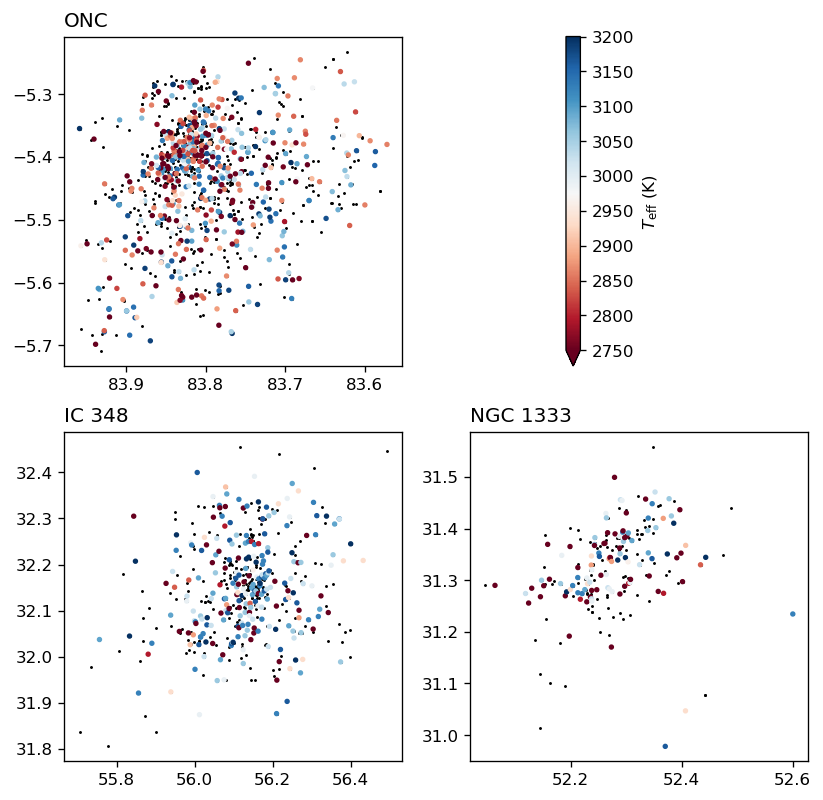

In [111]:
# Let's start by setting up the figure canvas, and working backwards from there.

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8,8), dpi=120)
cbar_ax = axs[0][1]
cbar_pos = cbar_ax.get_position().bounds
cbar_ax.set_position([cbar_pos[0]+0.1, cbar_pos[1], 0.015, cbar_pos[3]])

onc_ax = axs[0][0]
ic_ax = axs[1][0]
ngc_ax = axs[1][1]

onc_ax.plot(
    robb_coordinates.ra[confident_members], 
    robb_coordinates.dec[confident_members], 
    'k.', 
    label='Robberto+2020 members', 
    ms=1.5,
    zorder=-1,
)
onc_sc = onc_ax.scatter(
    robb_coordinates.ra[confident_members_M4_onc], 
    robb_coordinates.dec[confident_members_M4_onc], 
    c=robb_joined['Teff'][confident_members_M4_onc], 
    s=5,
    cmap='RdBu',
    vmin=2750
)
#     label='Robberto+2020 members', 
#     ms=3)
# plt.plot(robb_coordinates.ra[confident_bds], robb_coordinates.dec[confident_bds], 'm*', label='Robberto+2020 BDs', ms=5, mew=0.5)
onc_ax.invert_xaxis()
# onc_ax.add_colorbar()
cbar = fig.colorbar(onc_sc, cax=cbar_ax, label=(r"$T_{\rm{eff}}$ (K)"), extend='min')

onc_ax.set_title("ONC", loc='left')

ic_ax.plot(
    L16_T1_coordinates.ra, 
    L16_T1_coordinates.dec, 
    'k.', 
    ms=1.5,
    zorder=-1,
)

ic_teffs = get_Teff_from_SpT(L16_SpT_num_ic)

ic_sc = ic_ax.scatter(
    L16_T1_coordinates.ra[members_M4_ic], 
    L16_T1_coordinates.dec[members_M4_ic], 
    c=ic_teffs[members_M4_ic],
    s=5,
    cmap='RdBu',
    vmin=2750,
)

ngc_ax.plot(
    L16_T2_coordinates.ra, 
    L16_T2_coordinates.dec, 
    'k.', 
    ms=1.5,
    zorder=-1,
)

ngc_teffs = get_Teff_from_SpT(L16_SpT_num)

ngc_sc = ngc_ax.scatter(
    L16_T2_coordinates.ra[members_M4_ngc], 
    L16_T2_coordinates.dec[members_M4_ngc], 
    c=ngc_teffs[members_M4_ngc],
    s=5,
    cmap='RdBu',
    vmin=2750,
)

ic_ax.set_title("IC 348", loc='left')
ngc_ax.set_title("NGC 1333", loc='left')

# ic_ax.colorbar(ic_sc)


In [39]:
bboxy = onc_ax.get_position()

In [44]:
bboxy.bounds

(0.125, 0.5368181818181819, 0.2818181818181818, 0.34318181818181814)

In [112]:
L16_SpT_num_ic

[2.5,
 -40.0,
 5.25,
 3.0,
 1.0,
 4.0,
 4.5,
 10.0,
 4.5,
 5.0,
 4.0,
 4.0,
 1.75,
 4.0,
 2.0,
 7.5,
 0.75,
 5.0,
 4.0,
 3.0,
 9.75,
 0.75,
 nan,
 5.25,
 6.5,
 5.75,
 7.25,
 1.5,
 4.0,
 5.0,
 1.5,
 4.5,
 3.5,
 9.0,
 nan,
 nan,
 -15.0,
 4.25,
 4.25,
 4.25,
 6.0,
 5.75,
 -10.0,
 -3.0,
 8.0,
 0.0,
 7.25,
 nan,
 nan,
 6.75,
 6.0,
 0.5,
 nan,
 5.0,
 3.75,
 1.75,
 3.5,
 5.75,
 7.0,
 nan,
 1.0,
 0.5,
 0.75,
 5.75,
 5.0,
 5.0,
 10.0,
 4.75,
 1.5,
 5.25,
 nan,
 nan,
 4.75,
 nan,
 6.0,
 5.5,
 5.0,
 3.0,
 5.0,
 2.0,
 4.75,
 5.75,
 1.0,
 -6.5,
 5.0,
 3.5,
 5.75,
 nan,
 6.5,
 4.25,
 4.25,
 4.25,
 4.5,
 9.0,
 4.75,
 4.5,
 -40.0,
 -10.0,
 -38.0,
 0.0,
 5.75,
 5.75,
 10.0,
 8.25,
 5.25,
 0.0,
 6.0,
 3.0,
 8.25,
 nan,
 5.5,
 nan,
 5.25,
 5.75,
 3.0,
 5.5,
 9.0,
 5.0,
 9.0,
 7.5,
 5.25,
 4.0,
 9.0,
 -10.0,
 5.0,
 8.0,
 5.25,
 2.5,
 6.0,
 0.75,
 -19.0,
 4.25,
 4.75,
 7.5,
 2.75,
 9.0,
 8.25,
 6.75,
 5.25,
 -30.0,
 5.75,
 3.75,
 4.0,
 4.25,
 7.0,
 5.25,
 3.5,
 2.0,
 4.75,
 8.0,
 4.0,
 2.5,
 4.75,
 2.0,
 n

In [113]:
531 + 105 + 238

874

In [114]:
285 + 65 + 84

434